In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#here is where you put the data in 
#diabetes = pd.read_csv('documents/github/Interdisplinary-computing-projrct/data/train_data')
diabetes=pd.read_csv('../Data/Train_data.csv')
#diabetes=pd.read_csv('downloads/diabetes.csv')
x=diabetes.to_numpy().tolist()
glucose=diabetes["Glucose"].to_numpy().tolist()
outcome=diabetes["Outcome"].to_numpy().tolist()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,82,70,0,0,21.1,0.389,25,0
1,5,147,78,0,0,33.7,0.218,65,0
2,7,161,86,0,0,30.4,0.165,47,1
3,3,128,72,25,190,32.4,0.549,27,1
4,3,128,78,0,0,21.1,0.268,55,0
...,...,...,...,...,...,...,...,...,...
686,9,130,70,0,0,34.2,0.652,45,1
687,2,68,70,32,66,25.0,0.187,25,0
688,3,81,86,16,66,27.5,0.306,22,0
689,0,138,0,0,0,36.3,0.933,25,1


In [3]:
#here is where you make and choose factors 
def make_data(x1):
    c=x1
    for i in range(len(x1)):

        del c[i][8]
        del c[i][3]
        #del c[i][1]
        del c[i][0]
        cek=c
    #print(x1)

# here we used the composite factors gbmi=glucose*bmi and gage=glucose*age, which significantly improve performance
def optimzed(x1):
    c=x1
    for i in range(len(x1)):
        gbmi=c[i][1]*c[i][5]
        gage=c[i][1]*c[i][7]
        c[i].append(gage)
        c[i].append(gbmi)
        del c[i][8]
        #del c[i][3]
        #del c[i][1]
        #del c[i][0]
        cek=c
    #print(x1)
optimzed(x)



In [4]:
#here we solve for the pseudo inverse matrix and print the weights. We also generate a prediction matrix 
'''def solution(x, outcome):
    a=np.matrix(x)
    inv=np.linalg.pinv(a)
    sol=np.matrix(outcome).transpose()
    weights=np.matmul(inv,sol)
    print(weights)
    predicted=np.matmul(a,weights).tolist()
    return predicted'''
def solutionw(x, outcome):
    a=np.matrix(x)
    inv=np.linalg.pinv(a)
    sol=np.matrix(outcome).transpose()
    weights=np.matmul(inv,sol)
    print(weights)
    predicted=np.matmul(a,weights).tolist()
    return weights
#predicted=solution(x,outcome)
weights=solutionw(x,outcome)





[[ 2.23978434e-02]
 [-1.02657270e-03]
 [-2.59664893e-03]
 [-1.75703327e-04]
 [-8.14770703e-05]
 [-7.63573517e-03]
 [ 1.63124233e-01]
 [-1.60896180e-03]
 [ 3.05109075e-05]
 [ 1.71877785e-04]]


In [5]:
#use the above weightings to calculate it with the test data
test=pd.read_csv('../Data/Verification_data.csv')
x=test.to_numpy().tolist()
outcome=test["Outcome"].to_numpy().tolist()
optimzed(x)
predicted=np.matmul(np.matrix(x),weights).tolist()
predictiontable=predicted

In [6]:
#This is for the non binary prediction model that gives answers as probabilities. It tells us our error 
def stats(predicted,outcome):

    alpha=np.matrix(outcome).transpose()-predicted
    alpha=alpha.tolist()
    #print(alpha)
    plist=predicted
    std=[]
    for i in range(len(outcome)):
        val=math.sqrt((alpha[i][0]**2))#/plist[i][0]**2)
        std.append(val)
    #print(std)
    std0=sum(std)
    std1=sum(std)/len(std)
    totalavg=sum(outcome)/len(outcome)
    return std1/totalavg
    #return std0/len(outcome)
lol=stats(predicted,outcome)

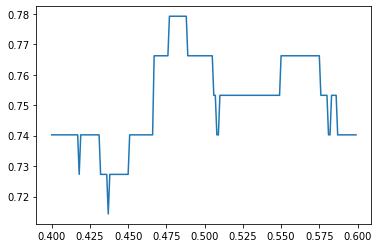

In [7]:
#Bias vs accuracy table
def statsbin(entry,outcome):
    score=[]
    for j in range(200):
        self=[]
        xd=[]
        for i in range(len(entry)):
            #print[entry[i]]
            if entry[i][0]<(.4+j/1000):
                xd.append(0)

            else:
                xd.append(1)
        self=xd
        #print(sum(self))
        #print(len(self))
        std=[]
        for i in range(len(outcome)):
            val=math.sqrt(((outcome[i]-self[i])**2))
            std.append(val)

        std0=sum(std)
        #print(std0)
        std0/len(outcome)
        accuracy1=1-std0/len(outcome)
        score.append([.4+j/1000,accuracy1])

    return score
lists=statsbin(predictiontable,outcome)
x=[]
y=[]
for j in range(200):
    x.append(.4+j/1000)
    y.append(lists[j][1])
plt.plot(x,y)

In [8]:
#turn probabilistic predictions into binary outcomes 
def binaryoutcome(entry):
    self=[]
    for i in range(len(entry)):
        #print[entry[i]]
        #print(entry[i][0])
        if entry[i][0]<.477:
            entry[i][0]=0
        else:
            entry[i][0]=1
        self.append(round(entry[i][0]))
    return self
predictbinary=binaryoutcome(predicted)


In [9]:
# save the prediction 
np.savetxt('Prediction_weight.txt',predictbinary)

In [346]:
#count the number of times we were wrong to figure out accuracy 
def statsbin(predicted,outcome):

    std=[]
    for i in range(len(outcome)):
        val=math.sqrt(((outcome[i]-predicted[i])**2))
        std.append(val)
    #print(std)
    std0=sum(std)
    #std1=sum(std)/len(std)
    #totalavg=sum(outcome)/len(outcome)
    return std0/len(outcome)
accuracy=1-statsbin(predictbinary,outcome)

In [347]:
accuracy

0.7792207792207793

In [348]:
predictbinary

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

## Title